## MIIA-4203 MODELOS AVANZADOS PARA ANÁLISIS DE DATOS II


# Introducción al aprendizaje computacional

## Actividad 1

### Profesor: Camilo Franco (c.franco31@uniandes.edu.co)



En esta actividad vamos a estudiar una primera aproximación a los modelos de aprendizaje computacional, utilizando como base un problema de clasifiación y el modelo de clasificación logístico.


## Actividad en grupos
### Nombres:

- Juan Camilo Marin Cala 
- Juan David Cortes Castillo
- Jonny Eduardo Coronel Villamil


## 1. Aprendizaje computacional

El aprendizaje computacional o **Machine Learning** (ML), utiliza algoritmos con parámetros libres que se puedan ajustar de manera automática, con el objetivo de mejorar el desempeño de los modelos a partir de la información disponible.

El aprendizaje computacional se circunscribe en el campo de la Inteligencia Computacional, o lo que se conoce como Inteligencia Artificial, mediante la búsqueda de patrones a partir de los *Datos*. Entonces, los algoritmos desarrollados dentro del Machine Learning (ML a partir de ahora) se pueden entender como los bloques fundacionales que permiten aprender computacionalmente a partir de los datos. De esta manera, generalizando los datos en lugar de solo almacenarlos y devolver busquedas específicas, como en los sistemas relacionales de bases de datos.


### Tipos de aprendizaje

Los tipos de problemas sobre los que se trabaja en ML se pueden entender como de tipo **supervisado**, **no supervisado**, y **semi-supervisado**. 

**Aprendizaje supervisado**

El aprendizaje supervisado se refiere a modelos, o conjuntos de algoritmos, que aproximan o estiman una función $f(x)$ que representa la relación entre la variable dependiente $Y$ (etiqueta o valor objetivo) y el conjunto de variables independientes $X$. Por ello a los algoritmos de tipo supervisado se les asocia usualmente con modelos predictivos, donde dado un conjunto de datos $X$, se puede predecir un nuevo valor de la variable dependiente $Y$. 

De acuerdo con el tipo de valores en $Y$, se pueden definir dos tipos principales de problemas y algoritmos para analizar los datos:

- Problemas de clasificación

Siempre que la variable $Y$ se refiera a un grupo de categorías (valores sin ningún orden en particular), como por ejemplo bueno/malo, pequeño/grande, la tarea de predecir $Y$ puede ser considerada como un problema de clasificación. En este sentido, las variables de salida se conocen como etiquetas o categorías.

- Problemas de regresión

Un problema de regresión consiste en estimar y/o predecir una variable dependiente (o valor objetivo) $Y$ con valores continuos. Por ejemplo, predecir el precio de una vivienda, de acciones, alimentos, etc. 

**Aprendizaje no-supervisado**
    
El aprendizaje no-supervisado considera problemas donde la variable dependiente $Y$, o las etiquetas para el conjunto de datos, no está disponible. Es decir, cuando $Y$ no está contenida en el conjunto de datos. Entonces, en lugar de estimar o predecir una variable, un algoritmo no-supervisado utiliza técnicas sobre el conjunto de datos de entrada $X$ para detectar patrones, encontrar reglas, o resumir y agrupar los datos. Usualmente, los algoritmos no-supervisados son utilizados para el análisis descriptivo y la modelación, donde se necesita una primera aproximación a los datos, desarrollar una intuición y extraer nuevo conocmiento que es desconocido para el analista y/o experto. 

En el aprendizaje no-supervisado, se tienen dos tareas principales, la reducción de dimensionalidad y el análisis de clustering.

- Reducción de dimensionalidad 

La reducción de dimensionalidad busca encontrar la estructura subyacente de los datos, reduciendo la cantidad de información disponible en el conjunto de datos $X$. Por ejemlo, es muy conocido el análisis de componentes principales. 

- Clustering 

El análisis de clustering consiste en agrupar un conjunto de datos $X$ de manera que cada grupo contenga observaciones más similares entre sí que con las observaciones de otros grupos. Estos grupos son denominados *clusters*. Es una técnica bastante común para la exploración de los datos y su análisis. 


#### Otros tipos de aprendizaje

Más allá de estos dos tipos de aprendizaje presentados anteriormente, existen otros tipos que son bastante útiles dependiendo de la naturaleza del problema. Por ejemplo, el **aprendizaje semi-supervisado** (https://medium.com/inside-machine-learning/placeholder-3557ebb3d470) o el **aprendizaje por refuerzo** (https://medium.com/machine-learning-for-humans/reinforcement-learning-6eacf258b265) 

## 2. Problema de clasificación: riesgo de default

### 2.1 Datos

Como hemos visto, una tarea muy usual dentro del ML es la de la clasificación. Pero antes, vamos a importar las bibliotecas que vamos a usar en este cuaderno.

In [2]:
# Algunos paquetes iniciales que vamos a utilizar
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [3]:
data = pd.read_csv("germancredit.csv")

In [4]:
data.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [5]:
data.dtypes

Default             int64
checkingstatus1    object
duration            int64
history            object
purpose            object
amount              int64
savings            object
employ             object
installment         int64
status             object
others             object
residence           int64
property           object
age                 int64
otherplans         object
housing            object
cards               int64
job                object
liable              int64
tele               object
foreign            object
dtype: object

In [6]:
data.Default.value_counts()

0    700
1    300
Name: Default, dtype: int64

La clase positiva (default=1) tiene menos casos.  Además, es 5 veces más costoso clasificar a un usuario como bueno (Defualt=0) cuando es malo (Default=1), que clasificarlo como malo cuando es bueno.

In [7]:
data.foreign.value_counts()

A201    963
A202     37
Name: foreign, dtype: int64

Vemos que la mayoría de clientes de la base de datos son extranjeros.

## 2.2 Codificacion de variables categoricas

In [8]:
credit_1 = data.copy()
credit_1 = pd.get_dummies(credit_1, columns=['checkingstatus1','history','purpose','savings',
                                   'employ','status','others','property','otherplans','housing','job','tele', 
                                   'foreign'], prefix = ['checkingstatus1','history','purpose','savings',
                                   'employ','status','others','property','otherplans','housing','job','tele', 
                                   'foreign'])

print(credit_1.head())

   Default  duration  amount  installment  residence  age  cards  liable  \
0        0         6    1169            4          4   67      2       1   
1        1        48    5951            2          2   22      1       1   
2        0        12    2096            2          3   49      1       2   
3        0        42    7882            2          4   45      1       2   
4        1        24    4870            3          4   53      2       2   

   checkingstatus1_A11  checkingstatus1_A12  ...  housing_A152  housing_A153  \
0                    1                    0  ...             1             0   
1                    0                    1  ...             1             0   
2                    0                    0  ...             1             0   
3                    1                    0  ...             0             1   
4                    1                    0  ...             0             1   

   job_A171  job_A172  job_A173  job_A174  tele_A191  tele_A19

In [9]:
X = credit_1.iloc[:, 1:62]#[['duration','amount','installment','residence','age','cards','liable']]
Y = credit_1.iloc[:, 0]
X.shape

(1000, 61)

### 3. Regresión logística

Podemos estudiar un problema de clasificación desde una perspectiva probabilística, examinando una situación donde la variable respuesta ($Y_i$) consiste de dos categorías ($\{0,1\}$). La *regresión logística* estima la probabilidad de que una observación pertenezca a una de las dos categorías.

Entonces se modela la función de probabilidad $p(Y_i=1)$ de tal manera que tome un valor entre 0 y 1. La función de regresión logística consiste en la función *sigmoide* ($\sigma(\cdot)$) $$ p(Y_i)=p(Y_i=1)=\frac{e^{\beta_0 + \beta_1X_{1} + ... + \beta_k X_{k}}}{1+e^{\beta_0 + \beta_1X_{1} + ... + \beta_k X_{k}}}=\frac{e^{Z_i}}{1+e^{Z_i}}=\sigma(Z_i)$$
donde se tiene que 
$$log\frac{p(Y_i)}{1-p(Y_i)}=\beta_0 + \beta_1X_{1} + ... + \beta_k X_{k}.  $$


Por lo tanto, manteniendo todo lo demás constante, se puede estimar el cambio que una unidad extra en $X_1$ tiene sobre  el chance (o el *log-odds*) $log\frac{p(Y_i)}{1-p(Y_i)}$. Esta estimación está dada por $\hat \beta_1$. 


Los coeficientes del modelo se pueden estimar por el método de máxima verosimilitud, buscando iterativamente estimadores que maximicen la función de verosimilitud: $$ F_{\mathbf{\beta}}=\prod_{i:Y_i=1} p(Y_i)\prod_{i':Y_{i'}=0}(1-p(Y_{i'})). $$


Finalmente, la extensión del modelo logístico para múltiples clases o categorías ($C$) se hace calculando la probabilidad de una categoría ($C_i$) frente al resto y utilizando lo que se conoce como una función *softmax*: 
$$ \sigma (Z_i )={\frac {e^{Z_{i}}}{\sum _{j=1}^{|C|}e^{Z_{j}}}}{\text{ para }}i=1,\dotsc ,|C|$$


Miremos un ejemplo con nuestros datos sobre el comportamiento de los clientes del banco. Primero descargamos los paquetes que vamos a utilizar:

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

Por defecto, la funcion `LogisticRegression()` encuentra una solución mediante el algoritmo de Broyden–Fletcher–Goldfarb–Shanno (BFGS):  https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm

In [13]:
log = LogisticRegression(penalty='none', max_iter= 1500) 
log.fit(X, Y)
y_pred_log = log.predict(X)
log_coef = log.coef_
print(log_coef)

[[ 2.47469507e-02  1.09810047e-04  3.13259433e-01  1.97259480e-02
  -1.90902305e-02  7.35192452e-02 -5.01660732e-02  6.38315796e-01
   2.34271038e-01 -2.38487630e-01 -1.07331615e+00  4.21198205e-01
   3.54752521e-01 -1.57059639e-01 -8.90074593e-02 -9.69100572e-01
   6.91485785e-01 -9.04866714e-01 -1.31006755e-01 -2.85688223e-01
  -3.21845796e-01  2.27950271e-02  1.69726850e-01  4.07911630e-01
  -1.07196152e-01  1.94674030e-02  3.25535091e-01  1.52249659e-01
  -5.20776530e-02 -3.38558459e-01 -5.26365583e-01  3.61924656e-02
   1.20318352e-01  5.80559707e-02 -6.70107191e-01  1.63234578e-02
   2.42877428e-01 -8.02687408e-03 -5.10142314e-01 -1.63925185e-01
  -2.54427798e-02  1.79099001e-01 -5.92873166e-01 -4.44178441e-01
  -1.45334199e-01 -3.34598939e-02  1.83755590e-01  4.88112466e-02
   1.13739155e-01 -6.01767347e-01  2.96180724e-02 -3.40764843e-01
  -1.28070175e-01 -8.74712447e-02 -1.37606326e-01 -4.63003634e-02
  -1.67839011e-01 -1.35574493e-01 -3.03642452e-01  5.57356664e-02
  -4.94952

In [14]:
log.n_iter_

array([368])

### Ejercicio 3.1

Ajuste las opciones de la funcion `LogisticRegression`para conseguir que la solucion converja. Puede examinar la documentación de Python: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Se corre el modelo con un maximo de 1500 iteraciones, con la expectativa que este converja  en un número menor de iteraciones.

In [15]:
log = LogisticRegression(penalty='none', max_iter= 1500 ,  ) 
log.fit(X, Y)

LogisticRegression(max_iter=1500, penalty='none')

## Pregunta 3.2 

Cuántas iteraciones necesitó?

El modelo requirio 368 iteraciones para que la regresión logistica convergiera.

In [17]:
log.n_iter_

array([368])

## 4. Construccion de modelos predictivos

Partimos los datos de manera aleatoria en un conjunto de entrenamiento y otro de prueba. De esta manera, estimamos los coeficientes sobre los datos de entrenamiento, y ese mismo modelo lo probamos sobre los datos de prueba con el fin de controlar que el modelo esté generalizando bien y no se sobreajuste a los datos.

A continuación ejecutamos el codigo para obtener una partición con el 40% de los datos en el conjunto de prueba. Nótese que por defecto la funcion `train_test_split` sigue una partición estratificada, es decir, mantiene la distribución inicial de las clases en ambos conjuntos de entrenamiento y prueba:


In [18]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=42)
print("Tamaño de CE, CP: ", y_train.shape, y_test.shape)
print("Observaciones de la clase positiva en entrenamiento: " +str(sum(y_train)) +" y en prueba: " +str(sum(y_test)))

Tamaño de CE, CP:  (600,) (400,)
Observaciones de la clase positiva en entrenamiento: 182 y en prueba: 118


Lo podemos verificar:

In [19]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=42, stratify=Y)
print("Tamaño de CE, CP: ", y_train.shape, y_test.shape)
print("Observaciones de la clase positiva en entrenamiento: " +str(sum(y_train)) +" y en prueba: " +str(sum(y_test)))

Tamaño de CE, CP:  (600,) (400,)
Observaciones de la clase positiva en entrenamiento: 180 y en prueba: 120


A continuación ajustamos el modelo logístico y lo probamos:

In [20]:
logT = LogisticRegression(penalty='none', max_iter=1500)
logT.fit(X_train, y_train)
y_tr = logT.predict(X_train)
y_pred = logT.predict(X_test)

Con menos datos para entrenar probablemente el algoritmo necesite más iteraciones:

In [21]:
logT.n_iter_

array([749])

Examinemos los coeficientes del modelo y su desviación con respecto a la estimación anterior (que utilizaba todos los datos de la muestra).

In [22]:
logT_coef = logT.coef_
print(logT_coef)

[[ 2.52686652e-02  1.02117165e-04  3.48238974e-01  2.55262100e-02
  -9.18675274e-03  1.98510037e-01  3.31242815e-01  5.08645527e-01
   1.70840957e-01 -3.81353187e-01 -1.08364275e+00  3.24147953e-01
   3.82934375e-01 -1.65706225e-01 -1.74147875e-01 -1.15273769e+00
   1.73371035e-01 -9.70392361e-01 -5.32480916e-01 -2.62442743e-01
  -2.93405390e-01 -9.55614662e-02  1.56124717e-01  1.05501583e+00
  -1.61675762e-03 -1.41214041e-02  7.20259235e-01  2.52254964e-01
  -2.81078704e-01 -1.12978346e+00 -3.47161490e-01  7.19697209e-01
   3.65770120e-02 -2.36368886e-01 -1.14934528e+00 -1.56069512e-01
   2.80181724e-01 -2.03988297e-01 -6.22485242e-01 -2.39217642e-01
  -2.24723368e-01  2.89080095e-01 -8.49866184e-01 -5.19869712e-01
  -1.89204161e-01 -2.56732374e-01  1.80296790e-01  5.25383654e-02
  -2.31091458e-02 -8.14938677e-01  4.99417404e-01 -4.22439082e-01
  -8.62487778e-01 -1.37570495e-01 -1.26214792e-01 -1.55628938e-01
  -3.66095231e-01 -2.10119295e-01 -5.75390162e-01  4.37517535e-01
  -1.22302

In [23]:
print(log_coef-logT_coef)

[[-5.21714493e-04  7.69288175e-06 -3.49795413e-02 -5.80026201e-03
  -9.90347773e-03 -1.24990791e-01 -3.81408888e-01  1.29670269e-01
   6.34300801e-02  1.42865557e-01  1.03266050e-02  9.70502517e-02
  -2.81818539e-02  8.64658554e-03  8.51404161e-02  1.83637113e-01
   5.18114750e-01  6.55256472e-02  4.01474161e-01 -2.32454805e-02
  -2.84404059e-02  1.18356493e-01  1.36021323e-02 -6.47104198e-01
  -1.05579394e-01  3.35888071e-02 -3.94724144e-01 -1.00005306e-01
   2.29001051e-01  7.91225004e-01 -1.79204093e-01 -6.83504743e-01
   8.37413399e-02  2.94424857e-01  4.79238088e-01  1.72392970e-01
  -3.73042960e-02  1.95961423e-01  1.12342928e-01  7.52924575e-02
   1.99280588e-01 -1.09981094e-01  2.56993018e-01  7.56912706e-02
   4.38699620e-02  2.23272480e-01  3.45879938e-03 -3.72711886e-03
   1.36848301e-01  2.13171329e-01 -4.69799331e-01  8.16742397e-02
   7.34417604e-01  5.00992506e-02 -1.13915335e-02  1.09328575e-01
   1.98256220e-01  7.45448020e-02  2.71747710e-01 -3.81781868e-01
   7.28074

### Ejercicio 4.1

Implemente un proceso de validación cruzada cambiando la semilla de las particiones de train (CE) y test (CP). Estimae la varianza de los estimadores y concluya si su *mejor* modelo es estable entre distintas particiones.

In [24]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

In [25]:
modelo_logistico  =  LogisticRegression(penalty='none', max_iter=1500)

In [26]:
scores = cross_validate(modelo_logistico, X, Y, cv=20,return_train_score=True , return_estimator =True)

In [33]:
paramatros = pd.DataFrame()

### Cross Validation
Se estiman 100 modelos de regresiòn logistica cada uno con una semilla diferente en la partición y guardamos los parametros de cada uno de ellos para determinar su varianza. 

In [34]:
 for i in range(0,100): 
    modelo_logistico  =  LogisticRegression(penalty='none', max_iter=1500)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=i )   
    modelo_logistico.fit(X_train,y_train )
    ax = pd.DataFrame(modelo_logistico.coef_)
    paramatros = paramatros.append(ax, ignore_index=True)

Como se observa para cada iteración se almacenan los parametros para posteriormente calcular sus varianzas y estabilidad en los parametros.

In [35]:
paramatros

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.032671,0.000131,0.256003,-0.058306,-0.003321,0.286603,0.066050,0.874769,0.078894,-0.731736,...,-0.227157,-0.897767,-0.610010,-0.083917,-0.366080,0.228062,-0.096377,-0.735567,0.414970,-1.246915
1,0.025095,0.000163,0.445282,0.104586,-0.030611,0.590142,-0.093780,0.517398,-0.019519,-0.144523,...,-0.361042,-0.463306,-0.386534,0.004146,-0.244736,-0.085657,-0.129780,-0.583002,-0.105507,-0.607274
2,0.021471,0.000155,0.351746,0.082672,-0.016930,-0.146167,0.722969,0.647529,0.408096,-0.889756,...,-0.412127,-0.467079,-0.627033,-0.001143,-0.158485,-0.007982,-0.201590,-0.593053,0.148284,-0.942927
3,0.050314,0.000015,0.185378,0.026086,-0.037256,0.187264,0.005782,0.610711,0.105193,-0.177144,...,-0.057431,-0.571172,-0.821983,0.241457,0.091958,-0.080729,-0.111169,-0.458128,0.345634,-0.914931
4,0.024697,0.000101,0.202105,-0.122979,-0.005364,0.411503,-0.060393,0.675709,0.136873,-0.132811,...,-0.156505,-0.310036,-0.143884,0.001543,-0.094179,-0.230241,-0.154570,-0.312192,0.163843,-0.630605
5,0.031245,0.000163,0.410536,0.069726,0.000552,0.462986,0.522081,0.745727,0.200726,-0.834184,...,-0.481257,-0.514269,-0.263155,-0.068381,-0.377578,-0.311870,-0.351235,-0.669750,-0.077694,-0.943291
6,0.035841,0.000120,0.184033,-0.014322,-0.009471,0.088641,-0.151515,0.774915,0.218633,-0.071132,...,-0.287983,-0.190941,-0.106361,-0.117559,-0.040216,-0.177651,-0.114126,-0.327663,-0.160293,-0.281495
7,0.026395,0.000140,0.353871,-0.092337,-0.017035,-0.064316,0.182909,0.706089,0.135378,-0.309628,...,-0.445184,-0.080798,-0.180830,0.089259,0.036199,-0.372982,-0.186342,-0.242012,0.055065,-0.483419
8,0.015057,0.000211,0.300439,-0.002715,-0.019450,-0.251944,0.005165,0.550600,0.154253,-0.095307,...,-0.364931,0.046038,-0.219722,0.310221,-0.055993,-0.431610,-0.071361,-0.325745,0.096347,-0.493453
9,0.016759,0.000215,0.377367,-0.175569,-0.015515,0.477543,0.204756,0.697222,0.250206,-0.785094,...,-0.533982,-0.546195,-0.168957,0.063893,-0.169763,-0.570421,-0.325795,-0.519452,0.587066,-1.432313


### Varianza de los estimadores
Como se puede observar las varianzas de los parametros de los 100 modelos son cercanas a cero, lo que sugiere estabilidad en el modelo  y que los parametros no dependeran de los datos con que ha sido entrenado y a pesar de que utilice una fuente de entrenamiento diferente los parametros son muestran estabilidad

In [36]:
#Varianzas de los 60 estimadores
paramatros.apply( np.var, axis = 0  ) 

0     8.924147e-05
1     2.026380e-09
2     5.659725e-03
3     8.286682e-03
4     8.976482e-05
5     5.196595e-02
6     7.852071e-02
7     2.222371e-02
8     2.067581e-02
9     7.388158e-02
10    2.395845e-02
11    6.903227e-02
12    8.890777e-02
13    3.074476e-02
14    1.235242e-01
15    5.609330e-02
16    3.217300e-02
17    8.242234e-02
18    6.344895e-02
19    4.664152e-02
20    3.343637e-02
21    3.889619e-02
22    7.140910e-02
23    1.090161e-01
24    2.437993e-02
25    7.337504e-02
26    2.094608e-02
27    5.670370e-02
28    1.106236e-01
29    1.094580e-01
          ...     
31    8.808992e-02
32    4.305099e-02
33    2.325357e-02
34    4.732102e-02
35    3.159673e-02
36    7.005981e-02
37    2.777580e-02
38    3.387002e-02
39    4.618254e-02
40    4.458333e-02
41    6.724623e-02
42    9.911021e-02
43    2.627848e-02
44    2.324100e-02
45    2.325085e-02
46    4.528961e-02
47    4.486388e-02
48    8.308154e-02
49    2.374248e-02
50    2.496879e-02
51    3.015164e-02
52    7.5459

## 5. Evaluacion de los modelos
Hasta ahora hemos estimado los parámetros del modelo logístico. Pero no hemos examinado si la solución es satisfactoria. A continuación examinemos el desempeño de los modelos a partir de su matriz de confusión: 

In [37]:
from sklearn.metrics import confusion_matrix

# Calculamos la matriz de confusión para la prediccion
cm_log = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print(cm_log)

[[215  72]
 [ 82  31]]


Podemos mejorar esta visualización, añadiendo etiquetas para lo que es predicción y lo que es observado en la muestra:

In [38]:
def plot_confusion_matrix(cm, title='Matriz de confusión', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Etiqueta estimada')

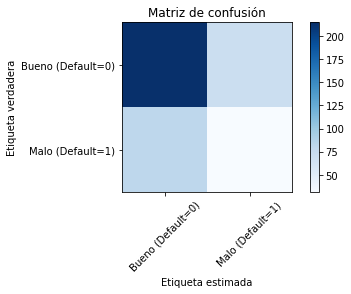

In [39]:
labels=['Bueno (Default=0)' ,'Malo (Default=1)']

plt.figure()
plot_confusion_matrix(cm_log)

Podemos resumir estos resultados, por ejemplo mediante la métrica de *exactitud* o *accuracy*, la cual mide la proporción de aciertos sobre el total de casos.

Para entrenamiento:

In [40]:
float((y_tr == y_train).mean())

0.61

Para predicción:

In [41]:
float((y_pred == y_test).mean())

0.615

### Ejercicio 5.1

Calcule una métrica de desempeño que tome en cuenta el coste de errar, donde el coste de predecir que un mal cliente es bueno es 5 veces más alto que el de confundir un buen cliente con uno malo.

Mediante la función calculada se puede generar una función de costo a partir de la matriz de confusión. 

In [43]:
from sklearn.metrics import confusion_matrix

# Calculamos la matriz de confusión para la prediccion
cm_log = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

#Matriz de confusión con Penalización
n_2=cm_log [0,0] + cm_log [0,1]*5 + cm_log [1,0] + cm_log [1,1]

Acc_2=(cm_log [0,0]  + cm_log [1,1])/n_2
Acc_2

0.35755813953488375

#### Se ve como la nueva medida de desempeño que penaliza los falsos positivos pasa a ser del 35%, casi la mitad del Accuracy anterior

### Justicia algorítmica

Veamos cómo se comporta el modelo de acuerdo con el origen (extranjero o local) del cliente. Por ejemplo, fijémonos en el balance inicial de los datos de la muestra:

In [44]:
credit_2 = credit_1.copy()
credit_3 = credit_2.loc[credit_2['foreign_A201'] == 1]
X3 = credit_3.iloc[:, 1:62]
Y3 = credit_3.iloc[:, 0]

credit_4 = credit_2.loc[credit_2['foreign_A201'] == 0]
X4 = credit_4.iloc[:, 1:62]
Y4 = credit_4.iloc[:, 0]

In [45]:
print("El numero de clientes extranjeros de la muestra: " +str(X3.shape[0]) +" y los locales: " +str(X4.shape[0]))

El numero de clientes extranjeros de la muestra: 963 y los locales: 37


## Pregunta 5.2

De los clientes locales cuantos han tenido Default?

In [46]:
Y4.value_counts()

0    33
1     4
Name: Default, dtype: int64

#### Vemos que ya hay un sesgo en los datos de entrenamiento. Por lo tanto, podemos esperar que esto se vea reflejado en nuestro modelo:

In [47]:
y_pred_f = logT.predict(X3)
y_pred_l = logT.predict(X4)

Veamos otra manera de visualizar la matriz de confusion:

Extranjeros:


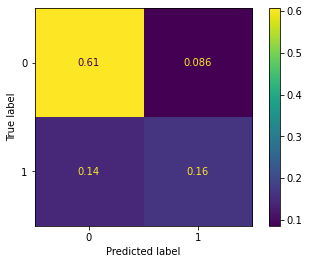

Locales:


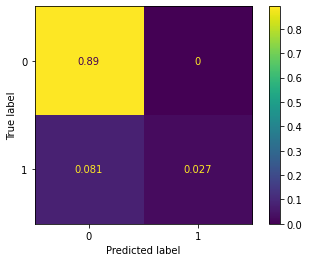

In [48]:
from sklearn.metrics import plot_confusion_matrix

print("Extranjeros:")
plot_confusion_matrix(logT, X3, Y3, normalize='all')  
plt.show() 

print("Locales:")
plot_confusion_matrix(logT, X4, Y4, normalize='all')  
plt.show()

Y las métricas de exactitud:

In [49]:
print("La exactitud para el usuario extranjero:", float((y_pred_f == Y3).mean()))
print("La exactitud para el usuario local:", float((y_pred_l == Y4).mean()))

La exactitud para el usuario extranjero: 0.770508826583593
La exactitud para el usuario local: 0.918918918918919


### Ejercicio 5.3

Proponga una modelo de clasificación que detecte clientes con un alto riesgo de Default, teniendo en cuenta el costo de clasificar a un cliente erroneamente  junto con la "equidad algoritmica".

se instala la función fairlearn que facilita la correción de modelos que requieren equidad algoritmica

In [ ]:
pip install fairlearn

In [ ]:
pip install https://github.com/adebayoj/fairml/archive/master.zip

In [55]:
from fairml import  audit_model

Como se puede observar mediante esta libreria se observa que la variable que mas sesgo le agrega al modelo es foreing de esta manera se elimina del modelo y adicionalmente se cambien los pesos de la clase 1 con el fin de penalizar mas los clientes en default

In [56]:
clf = LogisticRegression(penalty='l2', C=0.01)
clf.fit(X, Y)

LogisticRegression(C=0.01)

Mediante la función audit_model determinamos cuales son las variables que estan generando sesgo, y como se puede observar la varaible foreing es la que tiene el mayor aporte de sesgo al modelo, se busca generar alguna manera de hacer la correción.

In [57]:
total, _ = audit_model(clf.predict, X)
print(total)

Feature: duration,	 Importance: 0.175
Feature: amount,	 Importance: 0.175
Feature: installment,	 Importance: 0.297
Feature: residence,	 Importance: -0.322
Feature: age,	 Importance: -0.359
Feature: cards,	 Importance: -0.341
Feature: liable,	 Importance: -0.319
Feature: checkingstatus1_A11,	 Importance: 0.066
Feature: checkingstatus1_A12,	 Importance: 0.068
Feature: checkingstatus1_A13,	 Importance: -0.031
Feature: checkingstatus1_A14,	 Importance: -0.143
Feature: history_A30,	 Importance: 0.005
Feature: history_A31,	 Importance: 0.009
Feature: history_A32,	 Importance: -0.161
Feature: history_A33,	 Importance: -0.027
Feature: history_A34,	 Importance: -0.102
Feature: purpose_A40,	 Importance: 0.084
Feature: purpose_A41,	 Importance: -0.037
Feature: purpose_A410,	 Importance: 0.002
Feature: purpose_A42,	 Importance: -0.056
Feature: purpose_A43,	 Importance: -0.085
Feature: purpose_A44,	 Importance: 0.005
Feature: purpose_A45,	 Importance: 0.008
Feature: purpose_A46,	 Importance: 0.015


Mediante este modelo generamos una función de perdida en la cual le da  5 veces mas de peso a las observaciones de default, permitiendo asi que el modelo identifique que el equivocarse en esta categoria es mucho mas costoso que equivocarse en la categoria de no default.

In [58]:
clf = LogisticRegression( max_iter = 1500 ,  class_weight =[{0:1, 1: 5}]  )

clf.fit(X, Y)

LogisticRegression(class_weight=[{0: 1, 1: 5}], max_iter=1500)

In [212]:
y_pred_f = clf.predict(X3)
y_pred_l = clf.predict(X4)
print("La exactitud para el usuario extranjero:", float((y_pred_f == Y3).mean()))
print("La exactitud para el usuario local:", float((y_pred_l == Y4).mean()))

La exactitud para el usuario extranjero: 0.7694704049844237
La exactitud para el usuario local: 0.972972972972973


se importan las librerias que permitiran añadir al modelo la etica algortimica y de esta manera mejorarlo

In [59]:
from fairlearn.metrics import group_summary
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

In [60]:
clf = LogisticRegression( max_iter  = 1500,  class_weight =[{0:1, 1: 5}])
clf.fit(X, Y)

LogisticRegression(class_weight=[{0: 1, 1: 5}], max_iter=1500)

Se añaden restricciones al modelo que permiten brindar mayor equidad a costo de la precisión del modelo. 

In [61]:
fair = X.foreign_A201
constraint = DemographicParity()
classifier = LogisticRegression( max_iter  = 1500,  class_weight =[{0:1, 1: 5}])
mitigator = ExponentiatedGradient(classifier, constraint)
mitigator.fit(X, Y, sensitive_features= fair)
y_pred_mitigated = mitigator.predict(X)

In [217]:
cm_log3 = confusion_matrix(Y3, mitigator.predict(X3) , normalize = "all")
cm_log4 = confusion_matrix(Y4, mitigator.predict(X4), normalize = "all" )

print(cm_log3)
print(cm_log4)

[[0.62 0.07]
 [0.15 0.16]]
[[0.76 0.14]
 [0.03 0.08]]


In [218]:
y_pred_f = mitigator.predict(X3)
y_pred_l = mitigator.predict(X4)
print("La exactitud para el usuario extranjero:", float((y_pred_f == Y3).mean()))
print("La exactitud para el usuario local:", float((y_pred_l == Y4).mean()))

La exactitud para el usuario extranjero: 0.7819314641744548
La exactitud para el usuario local: 0.8648648648648649


### Como se puede observar el modelo mejora en la precisión de los dos grupos, haciendo que la diferencia de precisión entre los dos no sea tan amplia pero con el costo de la precisión del modelo del usuario local.

### Lecturas avanzadas

Para ler más sobre la ética algoritmica puede ver: Pessach, D., Shmueli, E. (2020) Algorithmic fairness. https://arxiv.org/abs/2001.09784 